### **Do exploratory data analysis on the data. Use linear regression and QDA classification techniques to predict the sales for CH or MM. Compare the methods**

### **Submitted By Aryan Bansal(2020EEB1162)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR_MODEL
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA_MODEL
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


Reading the Data

In [2]:
data = pd.read_csv('OJ.csv')

In [3]:
data.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


Checking the Shape and Decription of data

In [4]:
data.shape

(1070, 18)

In [5]:
data.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


Checking the Dataypes of various Parameters/Columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

Checking if Null values are there and if present , removing them

In [7]:
data.isnull().sum()

Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

Checking if Unique Values in each column


In [8]:
data.nunique()

Purchase            2
WeekofPurchase     52
StoreID             5
PriceCH            10
PriceMM             8
DiscCH             12
DiscMM             12
SpecialCH           2
SpecialMM           2
LoyalCH           553
SalePriceMM        18
SalePriceCH        13
PriceDiff          36
Store7              2
PctDiscMM          18
PctDiscCH          13
ListPriceDiff      18
STORE               5
dtype: int64

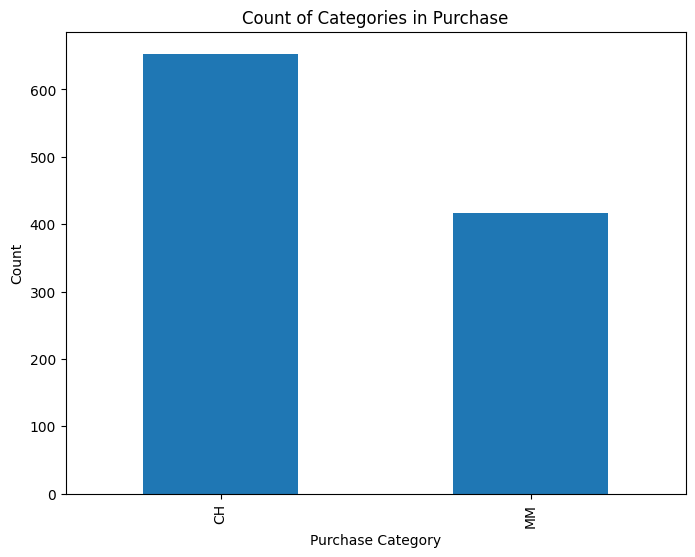

In [9]:
category_counts = data['Purchase'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar',)
plt.title('Count of Categories in Purchase')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()

Changing CH =1 and MA = 0  in Purchase & YES=1 and NO=0 in Store7

In [10]:
data['Purchase'] = data['Purchase'].apply(lambda x: 1 if x == 'CH' else 0)


In [11]:
data['Store7'] = data['Store7'].apply(lambda x: 1 if x == 'Yes' else 0)

Making the HeatMap for Correlation in Data

<Axes: >

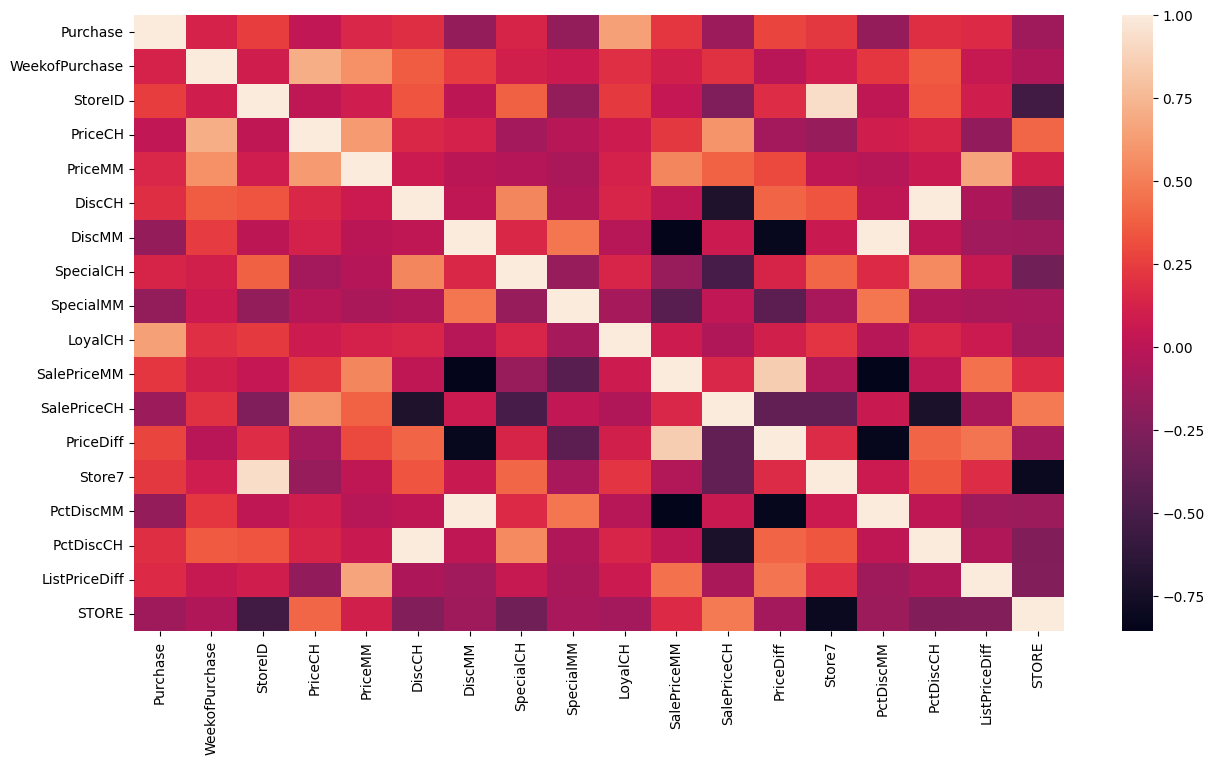

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr())

Making PairPLot to analyse variable dependency

<Figure size 1500x800 with 0 Axes>

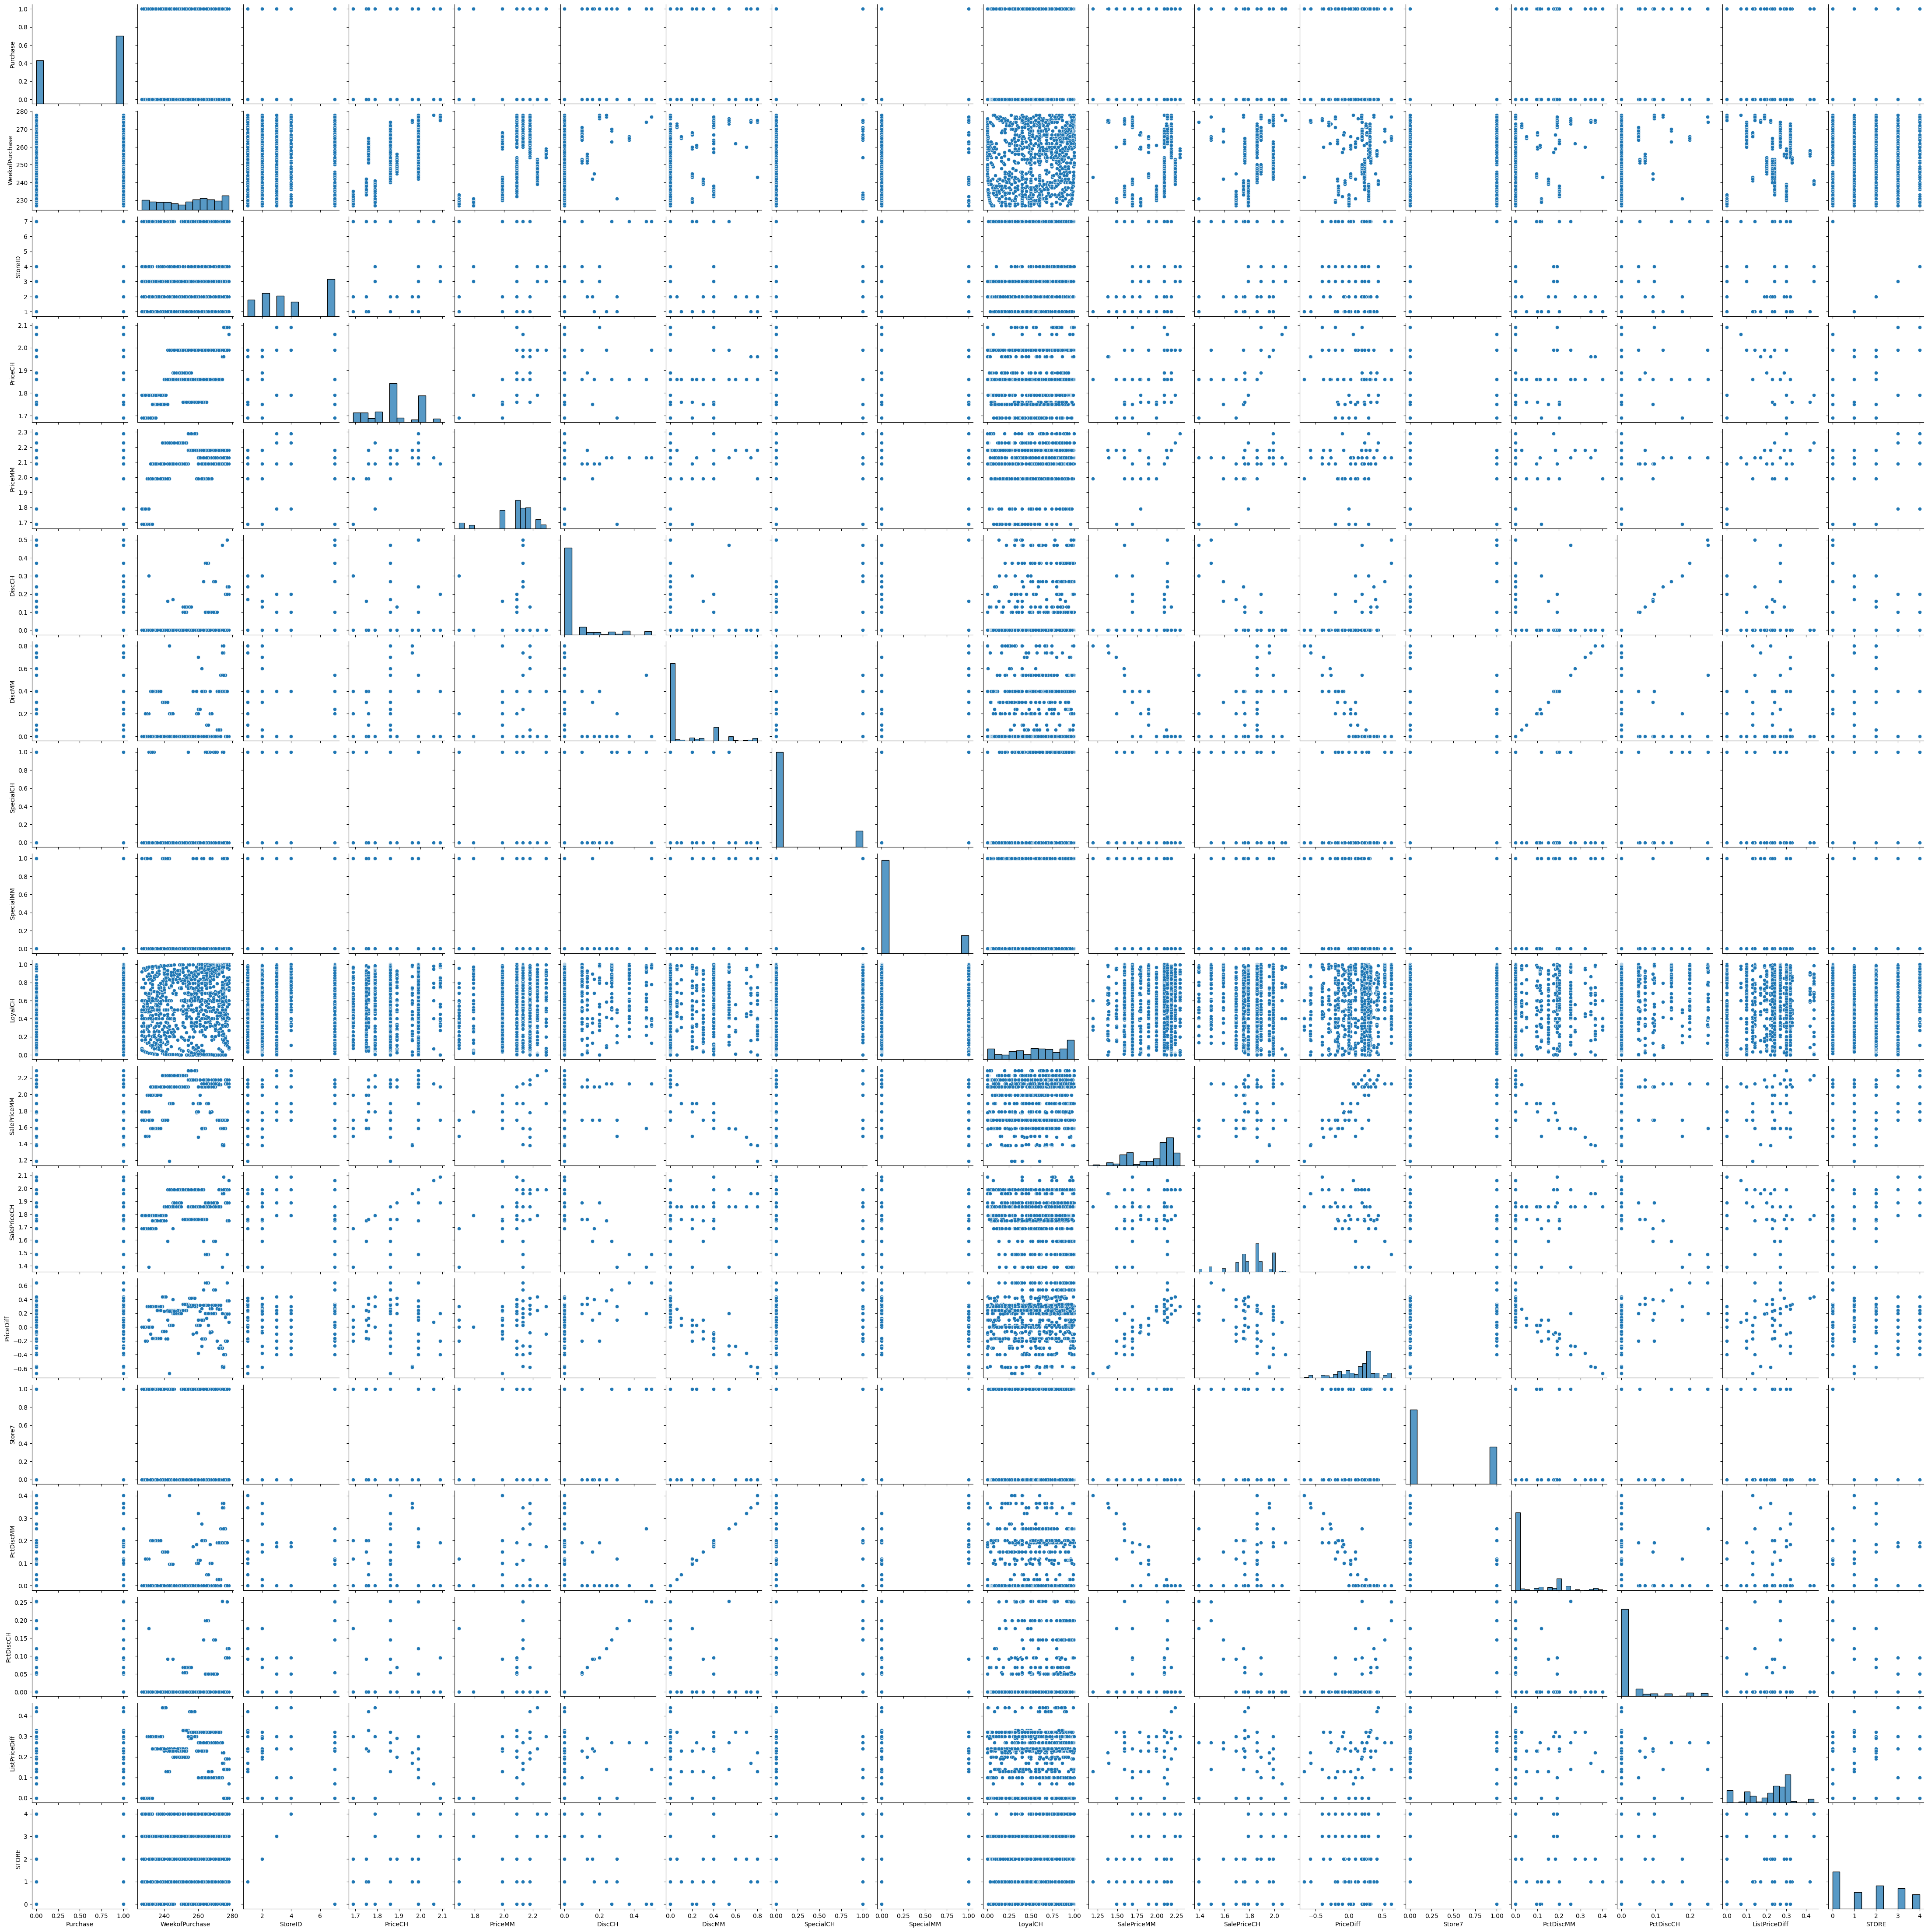

In [35]:
#takes time to execute , comment it or don't run if needed
plt.figure(figsize=(15,8))
sns.pairplot(data)

Making Results i.e Purchases as Y and Rest of input Variables as X

In [14]:
X = data.drop(['Purchase']  , axis =1)
X = X.astype(float)
Y = data['Purchase']
Y

0       1
1       1
2       1
3       0
4       1
       ..
1065    1
1066    1
1067    0
1068    1
1069    1
Name: Purchase, Length: 1070, dtype: int64

As there is multicollinearity as observed in HeatMap Above , I remove those using VIF. Got the Reference from [here](https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-pandas-columns-in-python)

In [15]:
def calculate_vif_(X, thresh):
    X = X.assign(const=1)  # faster than add_constant from statsmodels
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables[:-1]])
    return X.iloc[:, variables[:-1]]

In [16]:
X = calculate_vif_(X,7)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'StoreID' at index: 1
dropping 'PriceCH' at index: 1
dropping 'PriceMM' at index: 1
dropping 'DiscCH' at index: 1
dropping 'SalePriceMM' at index: 5
dropping 'PriceDiff' at index: 6
dropping 'DiscMM' at index: 1
dropping 'SalePriceCH' at index: 4
Remaining variables:
Index(['WeekofPurchase', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'Store7',
       'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')


The updated Input matrix without multicolinearity


In [17]:
X.head()

,WeekofPurchase,SpecialCH,SpecialMM,LoyalCH,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,237.0,0.0,0.0,0.500000,0.0,0.000000,0.000000,0.24,1.0
1,239.0,0.0,1.0,0.600000,0.0,0.150754,0.000000,0.24,1.0
2,245.0,0.0,0.0,0.680000,0.0,0.000000,0.091398,0.23,1.0
3,227.0,0.0,0.0,0.400000,0.0,0.000000,0.000000,0.00,1.0
4,228.0,0.0,0.0,0.956535,1.0,0.000000,0.000000,0.00,0.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WeekofPurchase  1070 non-null   float64
 1   SpecialCH       1070 non-null   float64
 2   SpecialMM       1070 non-null   float64
 3   LoyalCH         1070 non-null   float64
 4   Store7          1070 non-null   float64
 5   PctDiscMM       1070 non-null   float64
 6   PctDiscCH       1070 non-null   float64
 7   ListPriceDiff   1070 non-null   float64
 8   STORE           1070 non-null   float64
dtypes: float64(9)
memory usage: 75.4 KB


Making Heatmap of Correation data of new input Variables


<Axes: >

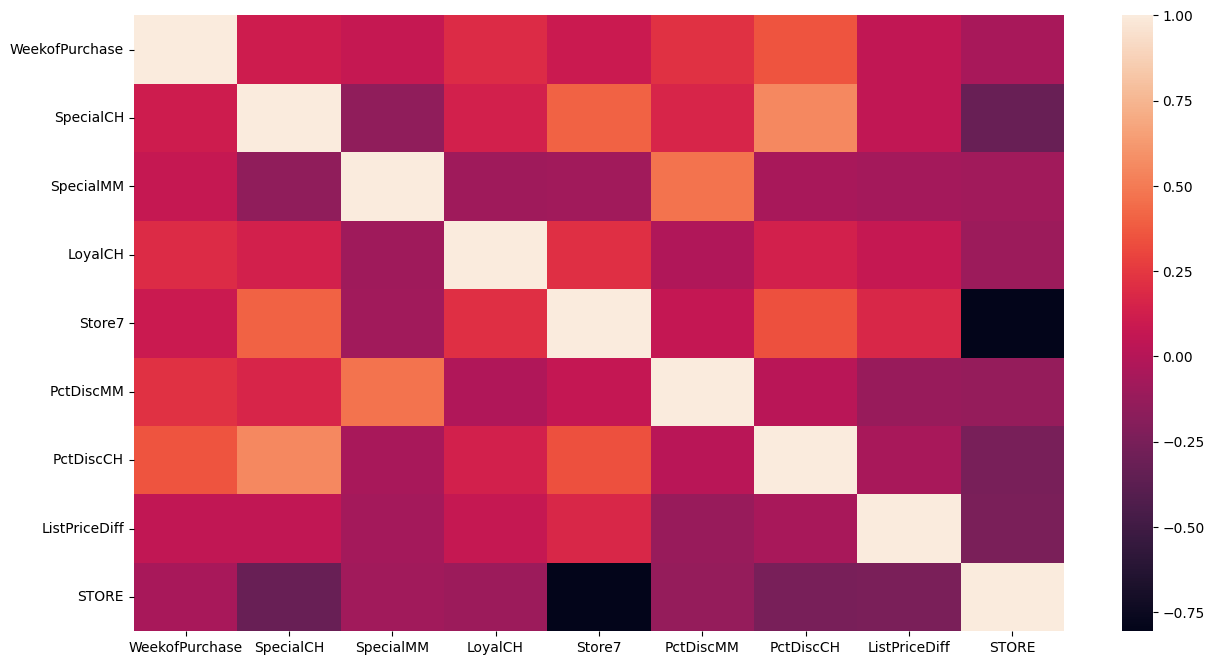

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr())

Checking Measures of centeral Tendency on the new Input data

In [20]:
print(X.mean())
print(X.var())
print(X.skew())
print(X.kurtosis())

WeekofPurchase    254.381308
SpecialCH           0.147664
SpecialMM           0.161682
LoyalCH             0.565782
Store7              0.332710
PctDiscMM           0.059298
PctDiscCH           0.027314
ListPriceDiff       0.217991
STORE               1.630841
dtype: float64
WeekofPurchase    242.060268
SpecialCH           0.125977
SpecialMM           0.135668
LoyalCH             0.094767
Store7              0.222222
PctDiscMM           0.010355
PctDiscCH           0.003873
ListPriceDiff       0.011564
STORE               2.046008
dtype: float64
WeekofPurchase   -0.210990
SpecialCH         1.989092
SpecialMM         1.840470
LoyalCH          -0.278889
Store7            0.711080
PctDiscMM         1.539491
PctDiscCH         2.422300
ListPriceDiff    -0.645208
STORE             0.249493
dtype: float64
WeekofPurchase   -1.274927
SpecialCH         1.960147
SpecialMM         1.389925
LoyalCH          -1.059837
Store7           -1.497167
PctDiscMM         1.272581
PctDiscCH         4.877696
L

Converting Pandas dataframe to Numpy Arrays for further process


In [21]:
input_X =  np.array(X)
output_Y =  np.array(Y)

Splitting the Data into training and Testing Data


In [22]:
train_X,test_X,train_Y,test_Y= train_test_split(input_X,output_Y,test_size=0.3)

### Making Linear Regression and analysis




I tested for various Threshold Limits with a step size of 0.05 and choose the threshold with Maximum Accuracy.

In [23]:
def train_linear_regression_model(train_X, train_Y):
    model_lr = LR_MODEL()
    model_lr.fit(train_X, train_Y)
    return model_lr
def predict_with_threshold(model, test_X, threshold):
    predictions = model.predict(test_X)
    temporary = predictions.copy()

    for i in range(len(predictions)):
        temporary[i] = 1 if predictions[i] > threshold else 0

    return temporary.astype(int)
def find_best_threshold(model, test_X, test_Y):
    threshold_values = np.arange(0, 1.05, 0.05)
    best_accuracy = 0
    best_predictions = None
    test_Y = test_Y.astype(int)
    best_threshold  = 0
    for threshold in threshold_values:
        temp_predictions = predict_with_threshold(model, test_X, threshold)
        temp_accuracy = accuracy_score(test_Y, temp_predictions)

        if temp_accuracy > best_accuracy:
            best_threshold = threshold
            best_accuracy = temp_accuracy
            # print(best_accuracy)
            best_predictions = temp_predictions

    return best_predictions.astype(int) , best_threshold

In [24]:
LR_model = train_linear_regression_model(train_X , train_Y)

Predicted Values for both Training and Testing Data

In [25]:
best_pred_test , threshold_test = find_best_threshold(LR_model , test_X, test_Y)

In [26]:
best_pred_train = predict_with_threshold(LR_model , train_X ,threshold_test )


Threshold Value for which it has maximum Acccuracy

In [27]:
threshold_test

0.65

Accuracy Score for Training and testing data

In [28]:
print("Accuracy of Linear Regression Model on Testing Data is = ",accuracy_score(test_Y, best_pred_test))
print("Accuracy of Linear Regression Model on Training Data is =" , accuracy_score(train_Y, best_pred_train))

Accuracy of Linear Regression Model on Testing Data is =  0.8161993769470405
Accuracy of Linear Regression Model on Training Data is = 0.8024032042723631


Building Confusion Matrix for the Predicted Values for Both Training and Testng Data

In [29]:
def confusion_matrix(Y_actual, Y_predicted,type_of_data ):
    print(f"-----------------------------------------{type_of_data}---------------------------------------------------")
    confusion_matrix = metrics.confusion_matrix(Y_actual,Y_predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    print(f"Accuracy of  Model on {type_of_data} Data is :",accuracy_score(Y_actual,Y_predicted))
    print(f"\n Classification report on {type_of_data} Data is : \n ", metrics.classification_report(Y_actual,Y_predicted))

-----------------------------------------Training---------------------------------------------------


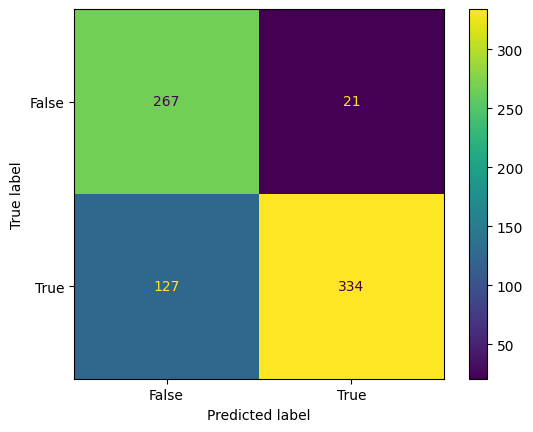

Accuracy of  Model on Training Data is : 0.8024032042723631

 Classification report on Training Data is : 
                precision    recall  f1-score   support

           0       0.68      0.93      0.78       288
           1       0.94      0.72      0.82       461

    accuracy                           0.80       749
   macro avg       0.81      0.83      0.80       749
weighted avg       0.84      0.80      0.80       749

-----------------------------------------Testing---------------------------------------------------


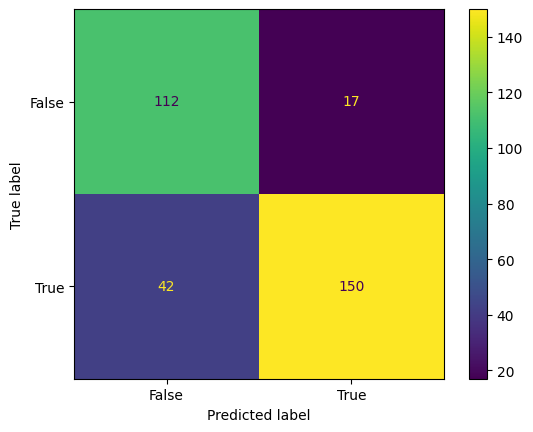

Accuracy of  Model on Testing Data is : 0.8161993769470405

 Classification report on Testing Data is : 
                precision    recall  f1-score   support

           0       0.73      0.87      0.79       129
           1       0.90      0.78      0.84       192

    accuracy                           0.82       321
   macro avg       0.81      0.82      0.81       321
weighted avg       0.83      0.82      0.82       321



In [30]:
confusion_matrix(train_Y, best_pred_train,"Training")
confusion_matrix(test_Y, best_pred_test,"Testing")

### **Making Receiver Operating Characteristic for Various Thresholld Values**

In [31]:
def get_roc_points(model, x_test, y_test):
    threshold_values = np.arange(0, 1.05, 0.05)
    roc_points = []

    for threshold in threshold_values:
        predictions = predict_with_threshold(model, x_test, threshold)
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_points.append((fpr, tpr, threshold))

    return roc_points

def plot_roc_curve(roc_points):
    roc_points.sort(key=lambda x: x[2])  # Sort by threshold
    plt.figure(figsize=(15,8))
    plt.scatter(0, 0, label='Threshold: 0.00', s=20)
    for i in range(len(roc_points) - 1):
        fpr1, tpr1, threshold1 = roc_points[i]
        fpr2, tpr2, threshold2 = roc_points[i + 1]
        plt.plot([fpr1[1], fpr2[1]], [tpr1[1], tpr2[1]], color='black', lw=0.5)
    fpr2, tpr2, threshold2 = roc_points[len(roc_points)-1]
    plt.plot([0, fpr2[1]], [0, tpr2[1]], color='black', lw=0.75)
    for fpr, tpr, threshold in roc_points:
        plt.scatter(fpr[1], tpr[1], label=f'Threshold: {threshold:.2f}', s=20)
        plt.text(fpr[1], tpr[1], f'{threshold:.2f}', fontsize=8, ha='left', va='bottom', color='black')

    # auc_values = [auc(fpr, tpr) for fpr, tpr, _ in roc_points]
    # mean_auc = np.mean(auc_values)
    # plt.text(0.5, 0.05, f'Mean AUC = {mean_auc:.2f}', ha='center', va='center', fontsize=12, color='black')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Joined Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

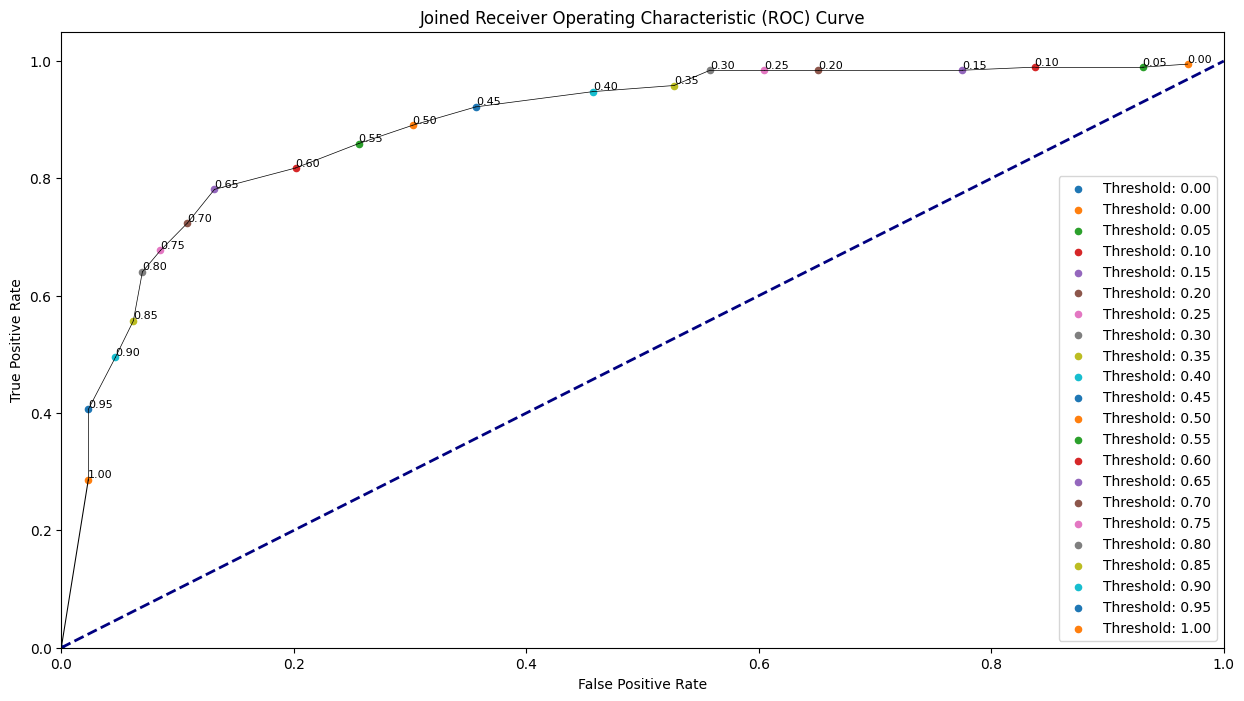

In [32]:
p = get_roc_points(LR_model , test_X, test_Y )
plot_roc_curve(p)

Training QDA

-----------------------------------------Training---------------------------------------------------


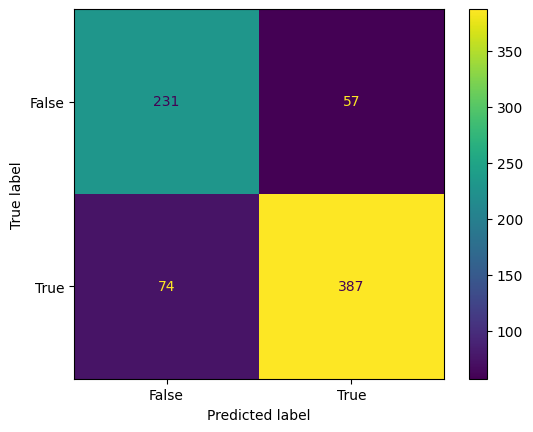

Accuracy of  Model on Training Data is : 0.8251001335113485

 Classification report on Training Data is : 
                precision    recall  f1-score   support

           0       0.76      0.80      0.78       288
           1       0.87      0.84      0.86       461

    accuracy                           0.83       749
   macro avg       0.81      0.82      0.82       749
weighted avg       0.83      0.83      0.83       749

-----------------------------------------Testing---------------------------------------------------


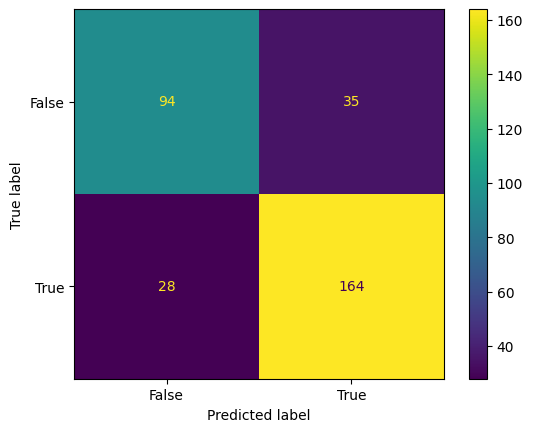

Accuracy of  Model on Testing Data is : 0.8037383177570093

 Classification report on Testing Data is : 
                precision    recall  f1-score   support

           0       0.77      0.73      0.75       129
           1       0.82      0.85      0.84       192

    accuracy                           0.80       321
   macro avg       0.80      0.79      0.79       321
weighted avg       0.80      0.80      0.80       321



In [33]:
def train_qda_model(train_X, train_Y):
    model_qda = QDA_MODEL()
    train_X = train_X.astype(float)
    train_Y = train_Y.astype(int)
    model_qda.fit(train_X, train_Y)
    return model_qda

def evaluate_qda_model(model, test_X, test_Y):
    predictions_qda_test = model.predict(test_X)
    predictions_qda_train = model.predict(train_X)

    confusion_matrix(train_Y , predictions_qda_train, "Training")
    confusion_matrix(test_Y , predictions_qda_test, "Testing")
    return predictions_qda_test ,  predictions_qda_train

model_qda = train_qda_model(train_X, train_Y)
predicted_qda_test ,predictions_qda_train =  evaluate_qda_model(model_qda, test_X, test_Y)

Plotting ROC curve for Both QDA and for best Threshold in Linear Regression:

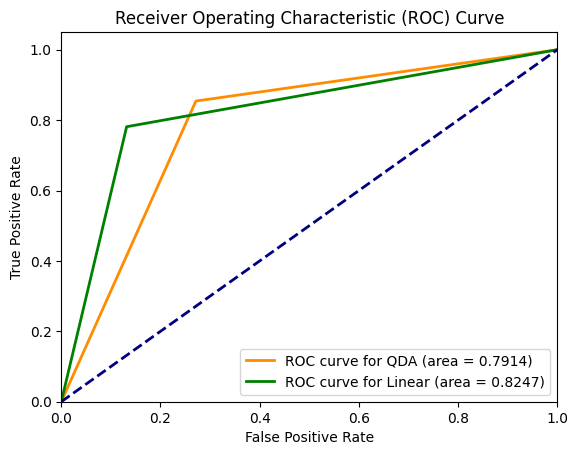

In [34]:
def plot_roc_curve(true_Values, predicted_prob_qda, predicted_prob_linear):
    fpr1, tpr1, thresholds1 = roc_curve(true_Values, predicted_prob_qda)
    roc_auc_qda = auc(fpr1, tpr1)
    fpr2, tpr2, thresholds2 = roc_curve(true_Values, predicted_prob_linear)
    roc_auc_linear = auc(fpr2, tpr2)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve for QDA (area = {:.4f})'.format(roc_auc_qda))
    plt.plot(fpr2, tpr2, color='Green', lw=2, label='ROC curve for Linear (area = {:.4f})'.format(roc_auc_linear))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(test_Y, predicted_qda_test,best_pred_test)